## Лабораторная работа 3

In [1]:
# Нужные библиотеки
from PIL import Image
from PIL import ImageDraw

from matplotlib import pyplot as plt
import numpy as np

##### 1. Возьмите полученную в 1-й лабораторной работе картинку и переведите её в grayscale-режим.

In [2]:
# Получение изображения
img = Image.open('res.jpg')
img_copy = img.copy()

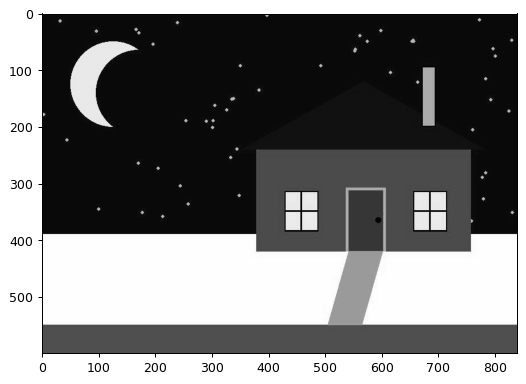

In [3]:
# Переводим изображение из 1-й лабораторной в grayscale-режим
draw = ImageDraw.Draw(img_copy)
width = img_copy.size[0]
height = img_copy.size[1]
pix = img_copy.load()
for i in range(width):
    for j in range(height):
        r = pix[i, j][0]
        g = pix[i, j][1]
        b = pix[i, j][2]
        S = int(0.2126 * r) + int(0.7152 * g) + int(0.0722 * b)
        draw.point((i, j), (S, S, S))
plt.figure(figsize=(10, 5), dpi=90)
plt.imshow(img_copy)
plt.show()

In [4]:
img_copy.save('lab3/res.jpg') # сохраняем полученное изображение

##### 2. Постройте гистограммы изображений.

In [5]:
# Получение изображений
img_path = ['lab3/res.jpg', 'lab3/arch.jpg', 'lab3/Coins.jpg', 'lab3/rice.jpg']
images = []
for i in img_path:
        img = Image.open(i)
        img_copy = img.copy()
        images.append(img_copy)

In [6]:
# Отрисовка гистограм
def histogram(image):
    plt.figure(figsize=(16,13), dpi=90)
    plt.subplot2grid((3,3), (0,0))
    plt.imshow(image)
    plt.title('Изображение')
    plt.subplot2grid((3,3), (0,1))
    plt.hist(np.ravel(image), bins=256, alpha=0.5)
    plt.title('Гистограмма интенсивности цвета')
    plt.show()

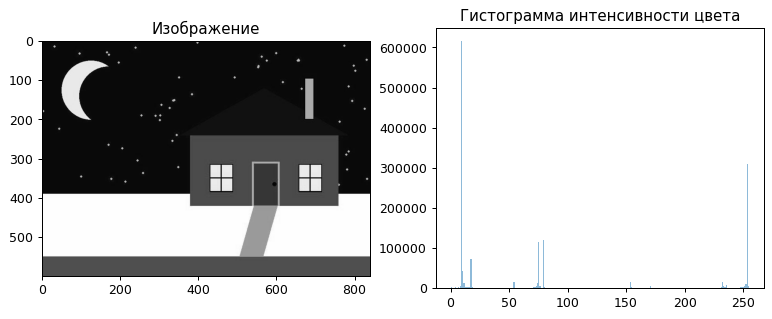

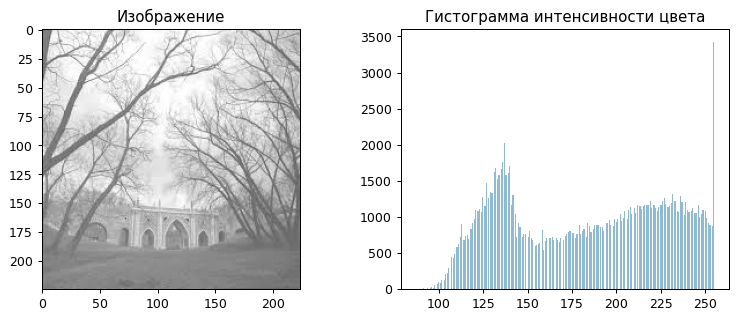

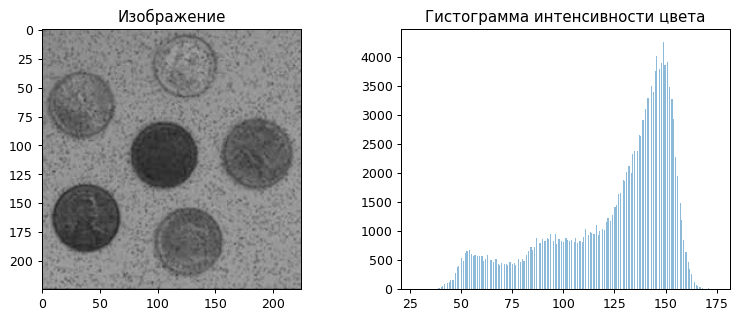

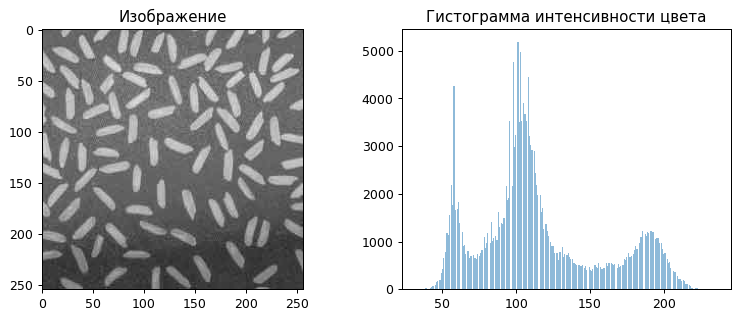

In [7]:
# Строим гистограммы интенсивности цвета для изображений
for i in images:
    histogram(i)

* Гистограммы показывают интенсивность определенного цвета.

##### 3. Подберите и выполните логарифмические преобразования изображений с помощью попиксельной обработки, постройте гистограммы полученных изображений. 

In [8]:
# Отображение результатов
def draw_image3(image, imageNew):
    plt.figure(figsize=(16,13), dpi=90)
    plt.subplot2grid((3,3), (0,0))
    plt.imshow(image)
    plt.title('Исходное изображение')
    plt.subplot2grid((3,3), (0,1))
    plt.imshow(imageNew)
    plt.title('Преобразованное изображение')
    #Гистограммы двух изображений
    plt.subplot2grid((3,3), (0,2))
    plt.hist(np.ravel(image), bins=256, label=['Оригинал'], alpha=0.5)
    plt.hist(np.ravel(imageNew), bins=256, label=['Результат'], alpha=0.5)
    plt.title('Гистограмма интенсивности цвета')
    plt.legend()
    plt.show()

In [9]:
# Трансформация изображений
def transform(f, img):
    img_copy = img.copy() # Преобразовывать будем копию исходного изображения
    draw = ImageDraw.Draw(img_copy) #Создаем инструмент для рисования
    width = img_copy.size[0] #Определяем ширину
    height = img_copy.size[1] #Определяем высоту
    pixels = img_copy.load() #Выгружаем значения пикселей
    for i in range(width):
        for j in range(height):
            r, g, b = pixels[i, j]
            S = tuple(map(f, (r, g, b)))
            draw.point((i, j), S)

    draw_image3(img, img_copy)

In [10]:
# Логарифмическое преобразование
def f_log(x):
 c = 30
 return int(c * np.log(x + 1))

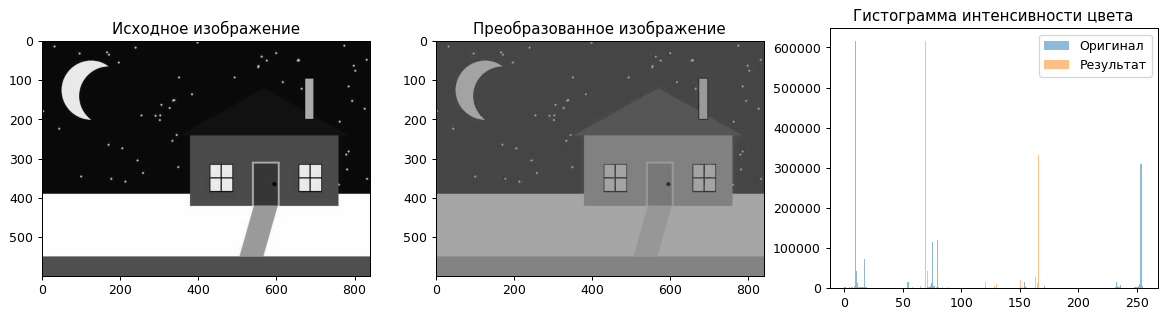

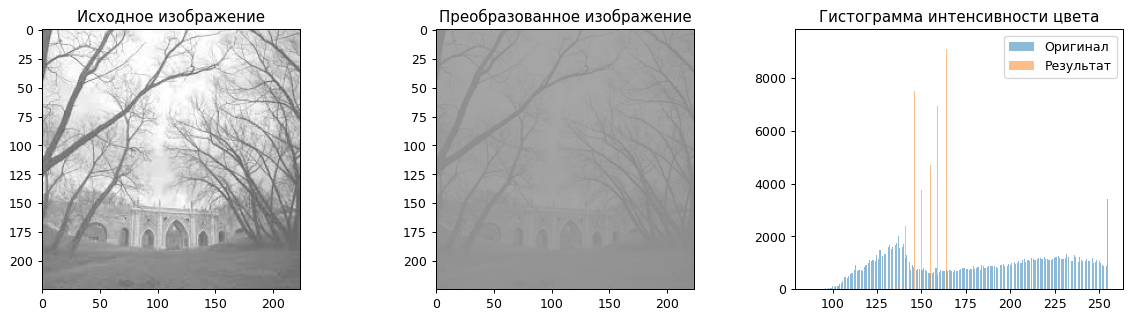

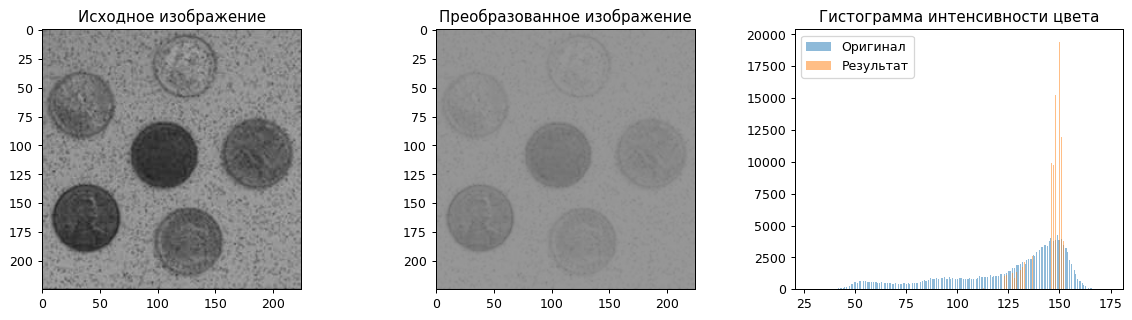

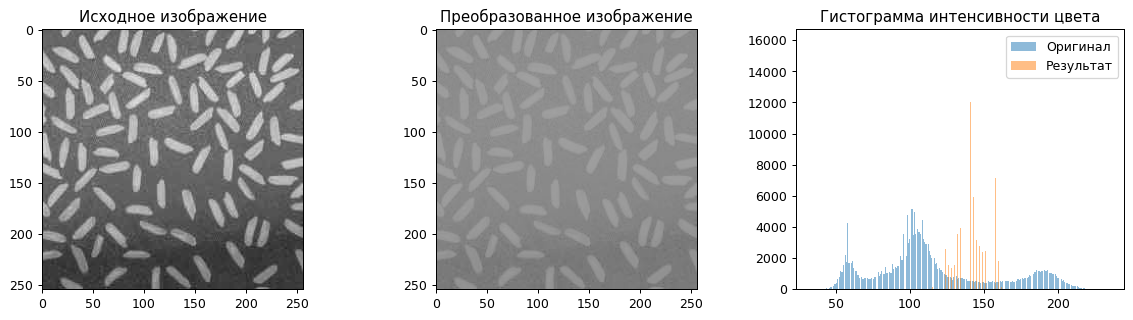

In [11]:
for i in images:
    transform(f_log, i)

* Логарифмическое преобразование отбражает узкий диапазон малых значений яркости на исходном изображении в более широкий диапазон выходных значений.
* Логарифмическое преобразование уменьшает диапазон больших значений яркости.
* Т.е. умешьшается разброс значений яркости.

##### 4. Подберите степенные преобразования и выполните гамма-коррекцию изображений, постройте гистограммы полученных изображений.

In [12]:
# Гамма-коррекция
def f_gamma(x):
 c = 0.0001
 return min(255, int(c * x**3))

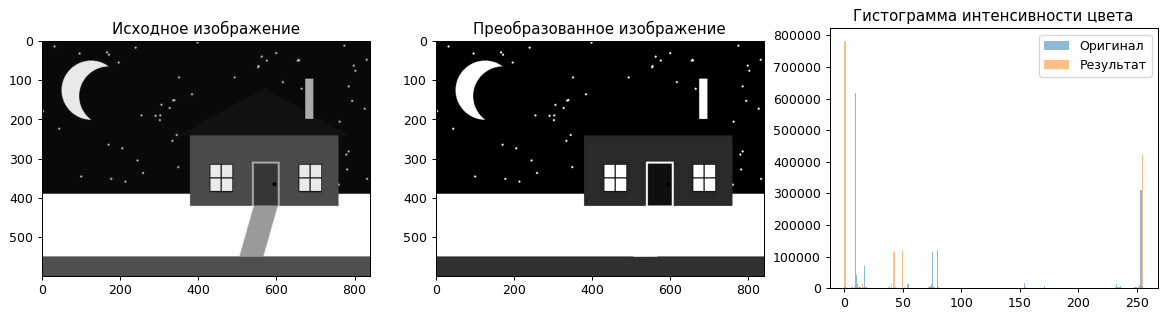

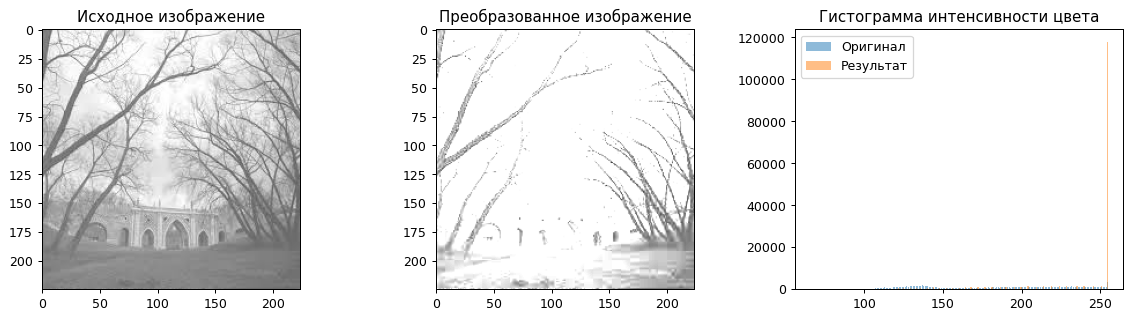

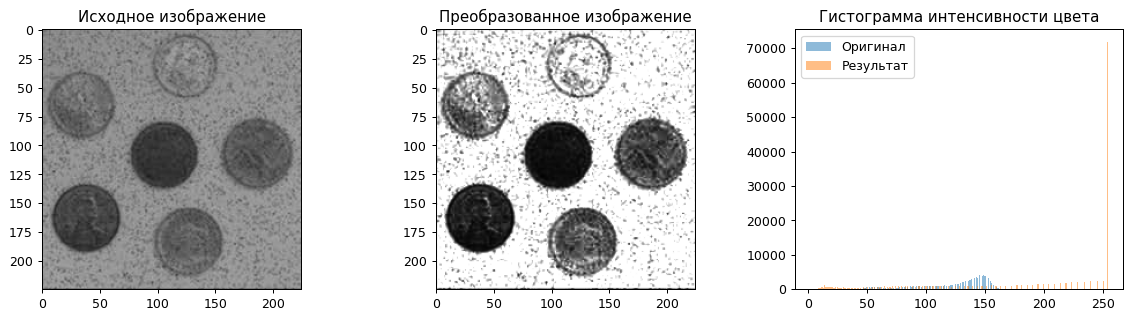

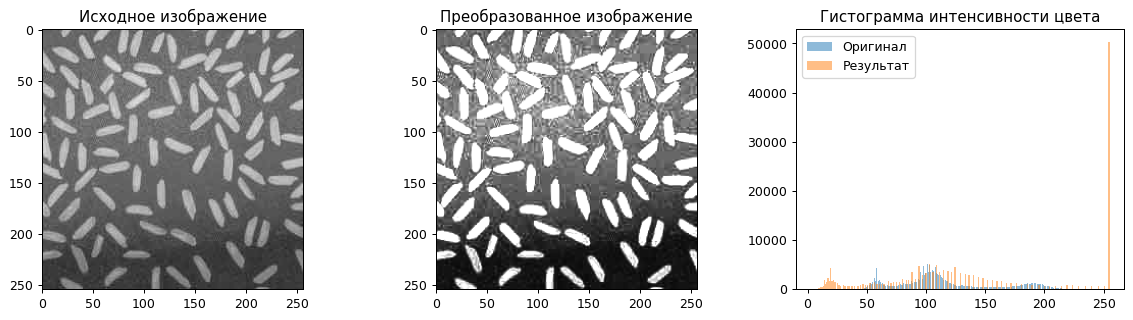

In [13]:
for i in images:
    transform(f_gamma, i)

* Гамма-коррекция регулирует яркость или контрастность изображения.
* Объекты стало лучше видно за счет осветления слабо освещенных участков.

##### 5. Поэкспериментируйте с кусочно-линейными преобразованиями вида:

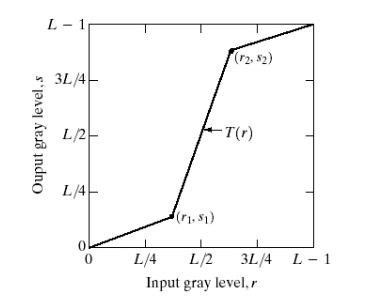

* Усилиние контраста точек, попавших в заданный диапазон яркостей.

In [14]:
# 1-е из кусочно-линейных преобразований
def f1(x):
 x1 = 50
 x2 = 150
 if x < x1 or x > x2:
    return int(2 * x)
 return int(0.5 * x)

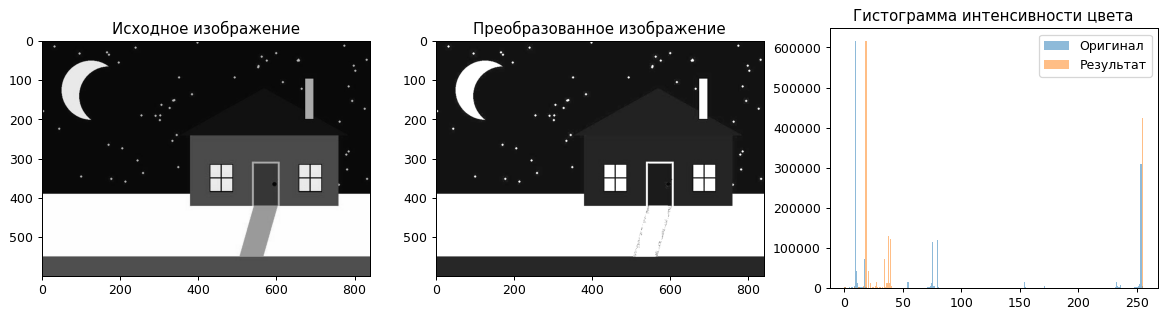

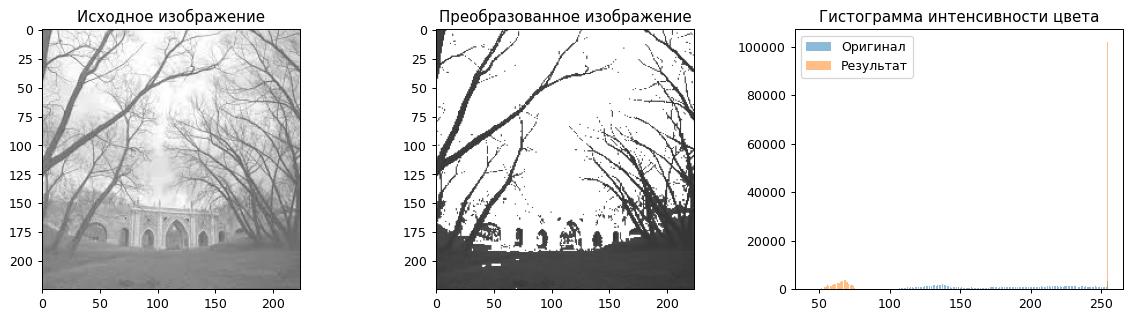

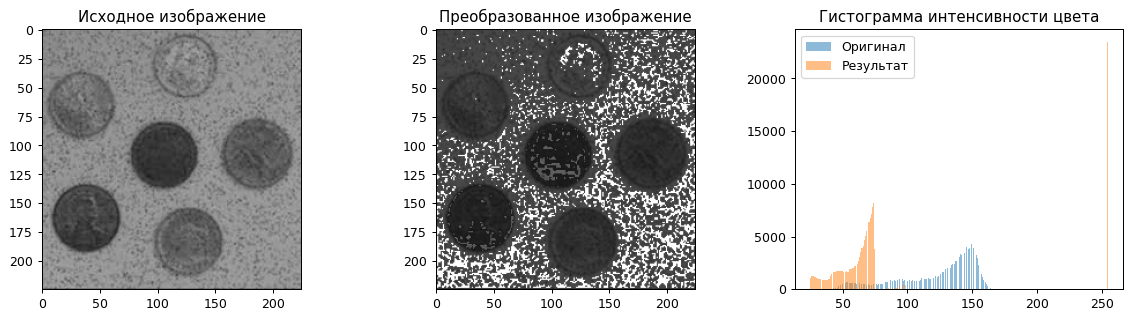

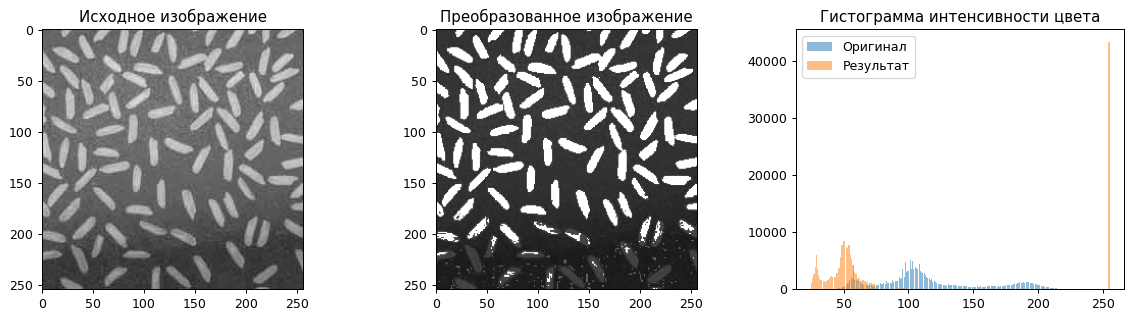

In [15]:
for i in images:
    transform(f1, i)

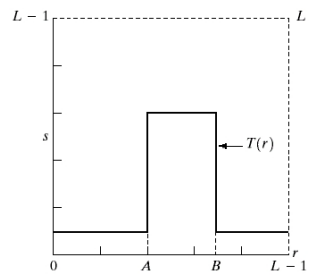

* Вырезание заданного диапазона яркостей с приведением остальных значений к константе.

In [16]:
# 2-е из кусочно-линейных преобразований
def f2(x):
 x1 = 50
 x2 = 150
 if x2 > x > x1:
    return 255
 return 0

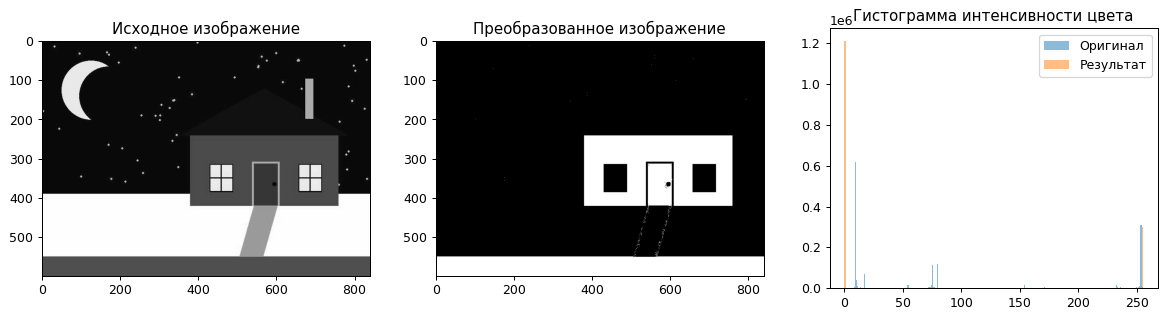

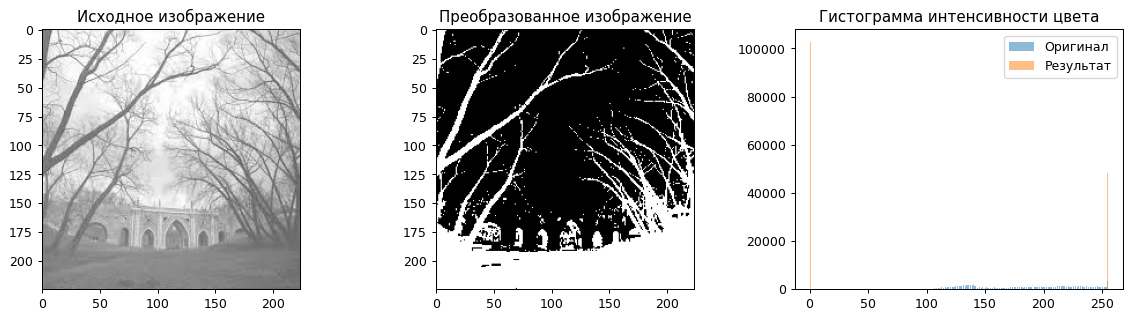

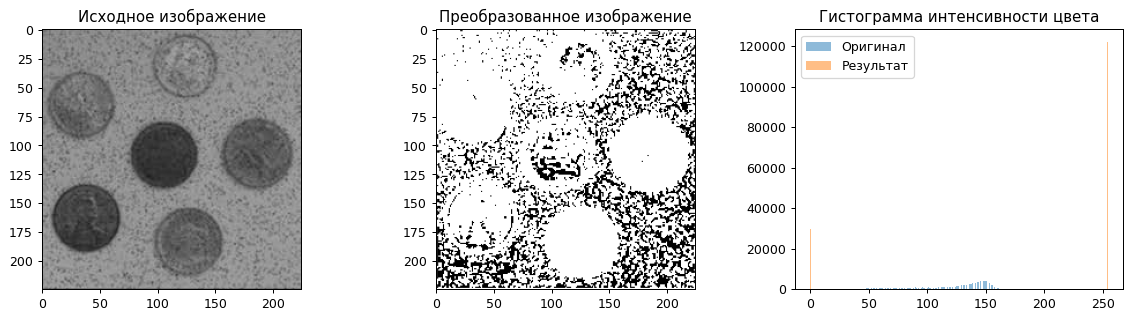

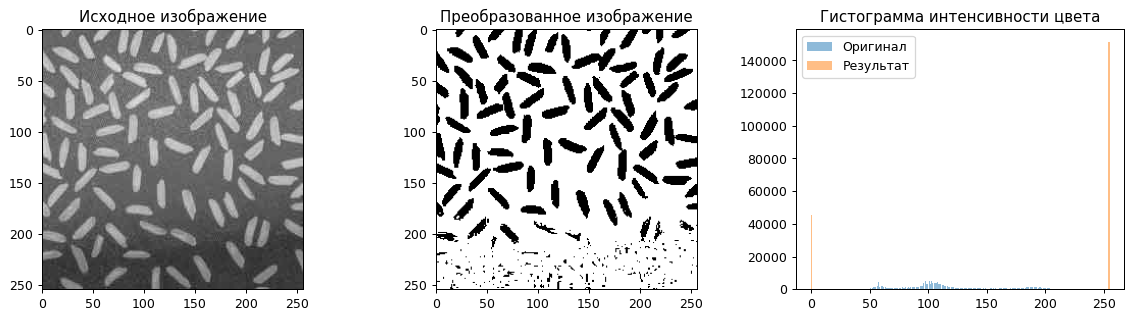

In [17]:
for i in images:
    transform(f2, i)

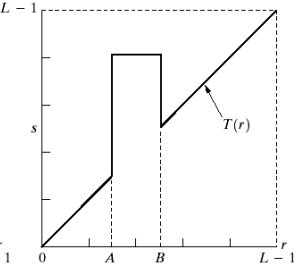

* Вырезание заданного диапазона яркостей с сохранением остальных значений.

In [18]:
# 3-е из кусочно-линейных преобразований
def f3(x):
 x1 = 50
 x2 = 150
 if x2 > x > x1:
    return 255
 return x

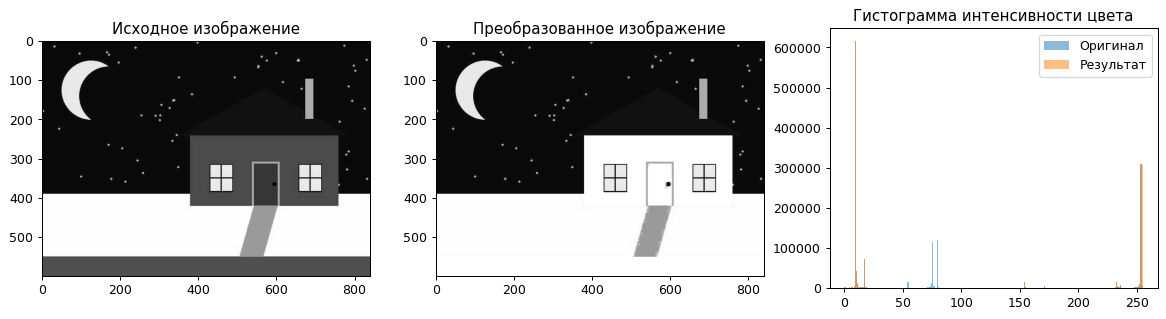

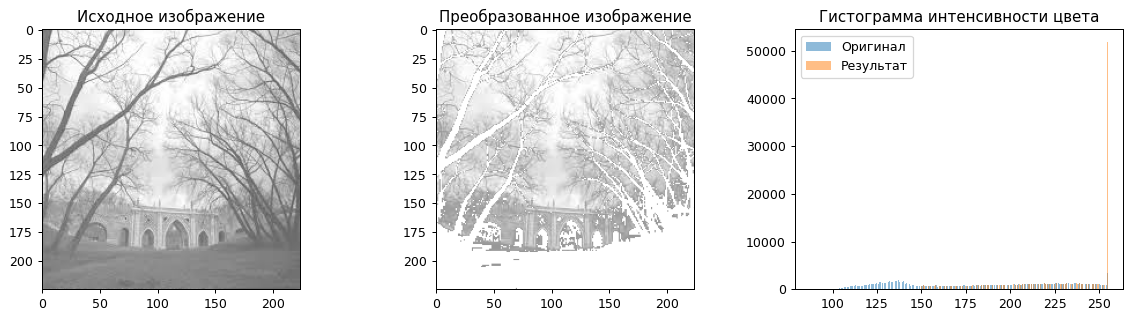

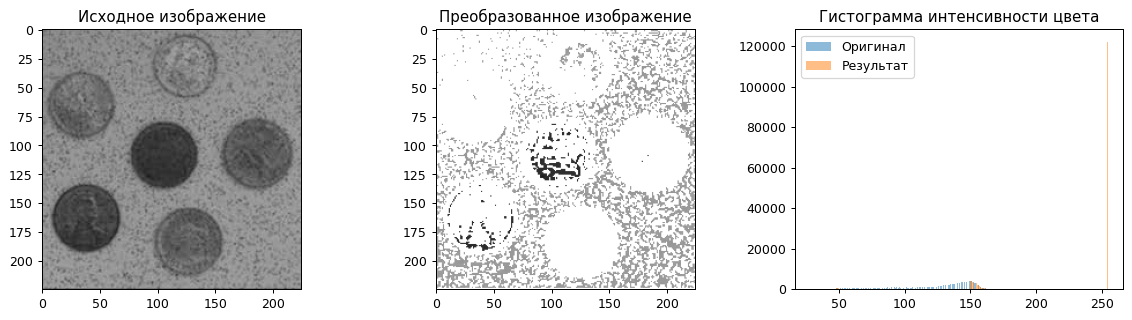

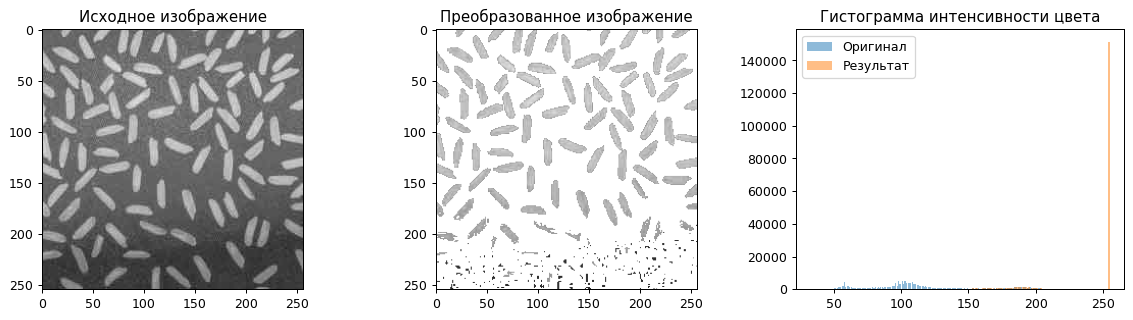

In [19]:
for i in images:
    transform(f3, i)

##### 6. Попробуйте выполнить пороговую сегментацию для многопиковых гистограмм, локализуйте отдельные объекты на изображениях с ее помощью.

In [20]:
# Пороговая сегментация
def f_bin(x):
 return 0 if x in range(70, 90) else 255

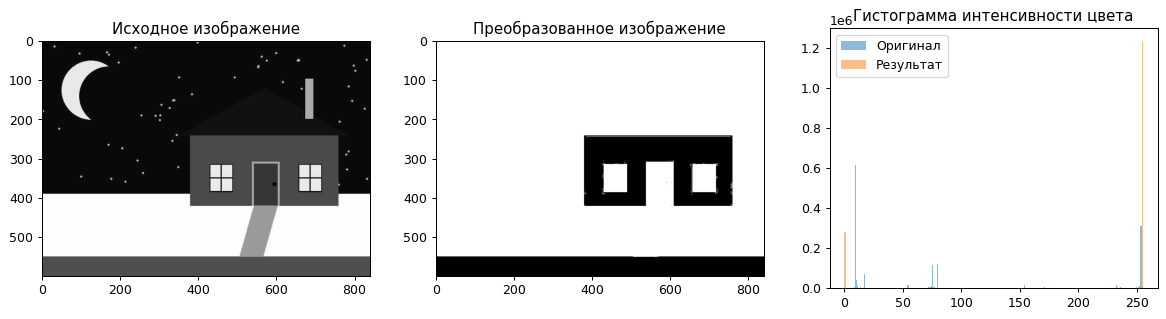

In [21]:
transform(f_bin, images[0])

* Пороговая сегментация разделяет изображение на различные области, основываясь на анализе значений яркостей точек путём сравнения с заданным диапазоном.
* Все что попало в заданный диапазон закрашивается черным, а остальное белым.